Simple Linear Legression

In [32]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as pl
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import statsmodels.api as sm
import numpy as np



Reading the file

In [33]:
# read csv file
data = pd.read_csv('expanded_post_secondary_dropout_dataset 1.csv')
data.head() # show the first five rows

,Student ID,Age,Gender,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,...,On-Campus,Work Hours,Mental Health,Advisor Meetings,Study Hours,Age at enrollment,Unemployment rate,Inflation rate,GDP,Target
0,1,36,Other,1.0,8.0,5.0,2.0,1.0,1.0,1.0,...,Yes,9,2,5,20,20.0,10.8,1.4,1.74,1
1,2,43,Male,1.0,6.0,1.0,11.0,1.0,1.0,1.0,...,Yes,28,2,3,27,19.0,13.9,-0.3,0.79,1
2,3,44,Female,1.0,1.0,5.0,5.0,1.0,1.0,1.0,...,No,1,2,2,21,19.0,10.8,1.4,1.74,1
3,4,18,Male,1.0,8.0,2.0,15.0,1.0,1.0,1.0,...,Yes,14,10,4,7,20.0,9.4,-0.8,-3.12,0
4,5,28,Female,2.0,12.0,1.0,3.0,0.0,1.0,1.0,...,Yes,3,1,2,18,45.0,13.9,-0.3,0.79,1


In [34]:
#extraordinary data analysis
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Student ID                  2600 non-null   int64  
 1   Age                         2600 non-null   int64  
 2   Gender                      2600 non-null   object 
 3   Marital status              2599 non-null   float64
 4   Application mode            2599 non-null   float64
 5   Application order           2599 non-null   float64
 6   Course                      2599 non-null   float64
 7   Daytime/evening attendance  2599 non-null   float64
 8   Previous qualification      2599 non-null   float64
 9   Nacionality                 2599 non-null   float64
 10  Mother's qualification      2599 non-null   float64
 11  Father's qualification      2599 non-null   float64
 12  Mother's occupation         2599 non-null   float64
 13  Father's occupation         2599 

,Student ID,Age,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,...,Extracurriculars,Work Hours,Mental Health,Advisor Meetings,Study Hours,Age at enrollment,Unemployment rate,Inflation rate,GDP,Target
count,2600.000000,2600.000000,2599.000000,2599.000000,2599.000000,2599.000000,2599.000000,2599.000000,2599.000000,2599.000000,...,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2599.000000,2599.000000,2599.000000,2599.000000,2600.000000
mean,1300.500000,31.697308,1.147749,6.819931,1.734129,9.851481,0.903424,2.553674,1.282801,11.898807,...,2.490000,14.973077,5.600000,2.448077,22.805769,22.974221,11.632705,1.207503,0.003297,0.861538
std,750.699674,8.109931,0.534875,5.296510,1.299210,4.282943,0.295436,4.025241,1.847448,8.952926,...,1.689856,8.951756,2.856986,1.726933,10.361806,7.461713,2.675913,1.369269,2.282115,0.345450
min,1.000000,18.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,5.000000,17.000000,7.600000,-0.800000,-4.060000,0.000000
25%,650.750000,25.000000,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,7.000000,3.000000,1.000000,14.000000,18.000000,9.400000,0.300000,-1.700000,1.000000
50%,1300.500000,32.000000,1.000000,8.000000,1.000000,10.000000,1.000000,1.000000,1.000000,13.000000,...,2.000000,15.000000,6.000000,2.000000,23.000000,20.000000,11.100000,1.400000,0.320000,1.000000
75%,1950.250000,39.000000,1.000000,12.000000,2.000000,12.000000,1.000000,1.000000,1.000000,22.000000,...,4.000000,23.000000,8.000000,4.000000,32.000000,24.000000,13.900000,2.600000,1.790000,1.000000
max,2600.000000,45.000000,6.000000,18.000000,6.000000,17.000000,1.000000,17.000000,21.000000,28.000000,...,5.000000,30.000000,10.000000,5.000000,40.000000,70.000000,16.200000,3.700000,3.510000,1.000000


In [35]:
#print the sum of all null values
data.isnull().sum()

#print the sum of all null values
data.isnull().sum()


,0
Student ID,0
Age,0
Gender,0
Marital status,1
Application mode,1
Application order,1
Course,1
Daytime/evening attendance,1
Previous qualification,1
Nacionality,1


**Encodiing the Dataset variables**

In [36]:
dataset=pd.read_csv('expanded_post_secondary_dropout_dataset 1.csv')

print(dataset)

# Check for missing data
null = dataset.isnull().sum()
print("\nMissing Data:")
print(null)

# Exploratory Data Analysis
print("\nDataset Info:")
dataset.info()
print("\nDataset Description:")
print(dataset.describe())

# Define the updated list of categorical columns
categorical_cols = [
    'Gender', 'Marital status', 'Application mode', 'Course',
    'Daytime/evening attendance', 'Previous qualification', 'Nacionality',
    "Mother's qualification", "Father's qualification", "Mother's occupation",
    "Father's occupation", 'Displaced', 'Educational special needs', 'Debtor',
    'Tuition fees up to date', 'Scholarship holder', 'On-Campus'
]

# Check unique values for each categorical column
print("\nUnique Values in Categorical Columns:")
for col in categorical_cols:
    if col in dataset.columns:
        unique_values = dataset[col].unique()
        print(f"{col}: {unique_values}")
    else:
        print(f"Warning: {col} not found in the dataset!")

# Apply One-Hot Encoding to the categorical columns
one_hot_encoded_data = pd.get_dummies(dataset, columns=categorical_cols, drop_first=True)

print("\nOne-Hot Encoded Data:")
print(one_hot_encoded_data)

# Select relevant columns for a new dataset
selected_columns = [
    'Gender_Male', 'Marital status_Married', 'Application mode_Online', 'Course_Science',
    'Daytime/evening attendance_Evening', 'Previous qualification_Bachelor',
    'Nacionality_International', "Mother's qualification_Bachelor",
    "Father's qualification_Bachelor", 'Displaced_Yes',
    'Educational special needs_Yes', 'Debtor_Yes', 'Tuition fees up to date_Yes',
    'Scholarship holder_Yes', 'HS GPA', 'Test Score', 'Family Income',
    'First Gen', 'Financial Aid', 'Credits Attempted', 'Credits Completed',
    'First Sem GPA', 'Attendance Rate', 'Extracurriculars', 'On-Campus_Yes',
    'Work Hours', 'Mental Health', 'Advisor Meetings', 'Study Hours',
    'Age at enrollment', 'Unemployment rate', 'Inflation rate', 'GDP', 'Target'
]

# Verify selected columns are in the encoded data
valid_columns = [col for col in selected_columns if col in one_hot_encoded_data.columns]
missing_columns = [col for col in selected_columns if col not in one_hot_encoded_data.columns]

if missing_columns:
    print(f"\nWarning: The following columns were not found and will be excluded: {missing_columns}")

newdata = one_hot_encoded_data[valid_columns]

print("\nNew Data:")
print(newdata.head())

      Student ID  Age  Gender  Marital status  Application mode  \
0              1   36   Other             1.0               8.0   
1              2   43    Male             1.0               6.0   
2              3   44  Female             1.0               1.0   
3              4   18    Male             1.0               8.0   
4              5   28  Female             2.0              12.0   
...          ...  ...     ...             ...               ...   
2595        2596   28   Other             1.0               8.0   
2596        2597   20    Male             1.0               1.0   
2597        2598   26   Other             1.0              14.0   
2598        2599   41  Female             1.0               8.0   
2599        2600   27   Other             NaN               NaN   

      Application order  Course  Daytime/evening attendance  \
0                   5.0     2.0                         1.0   
1                   1.0    11.0                         1.0   
2     

In [37]:
# Function to encode categorical variables
def encode_categorical(df, column):
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column].astype(str))
    return df

# Identify categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns

# Encode all categorical variables
for col in categorical_columns:
    data = encode_categorical(data, col)

In [38]:
# Update the `newdata` variable to use the updated parameters
newdata = dataset[
    [
        'Gender', 'Marital status', 'Course', 'Previous qualification',
        'Nacionality', 'Educational special needs', 'Scholarship holder',
        'HS GPA', 'Family Income', 'Target'
    ]
]

# Display the first few rows of the updated data
print("\nUpdated New Data:")
print(newdata.head())




Updated New Data:
   Gender  Marital status  Course  Previous qualification  Nacionality  \
0   Other             1.0     2.0                     1.0          1.0   
1    Male             1.0    11.0                     1.0          1.0   
2  Female             1.0     5.0                     1.0          1.0   
3    Male             1.0    15.0                     1.0          1.0   
4  Female             2.0     3.0                     1.0          1.0   

   Educational special needs  Scholarship holder  HS GPA  Family Income  \
0                        0.0                 0.0     2.1          44478   
1                        0.0                 0.0     3.7          48199   
2                        0.0                 0.0     2.3          33083   
3                        0.0                 0.0     3.8          53200   
4                        0.0                 0.0     2.7         100486   

   Target  
0       1  
1       1  
2       1  
3       0  
4       1  


<ipython-input-39-be3393f8a093>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = le.fit_transform(df[column].astype(str))


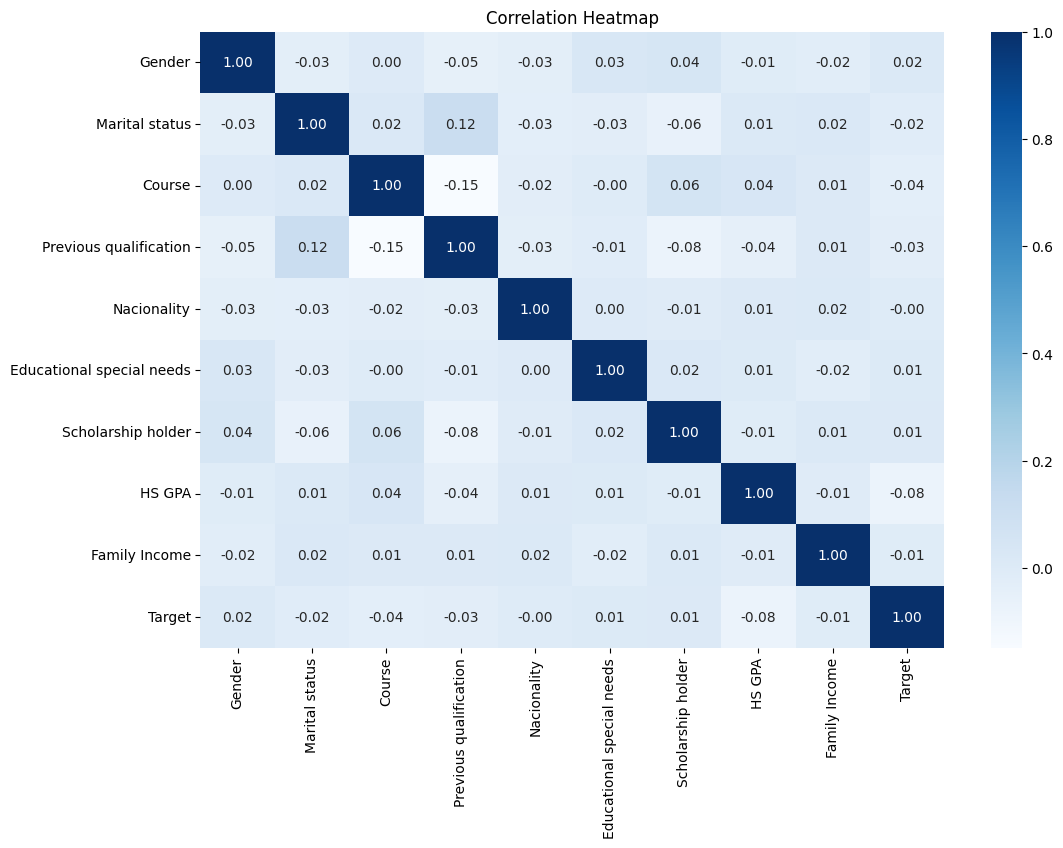

In [39]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Ensure all categorical variables in 'newdata' are encoded
def encode_categorical(df, column):
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column].astype(str))
    return df

# Identify categorical columns in 'newdata'
categorical_columns = newdata.select_dtypes(include=['object']).columns

# Encode all categorical variables
for col in categorical_columns:
    newdata = encode_categorical(newdata, col)

# Compute and plot the heatmap for numeric columns
numeric_columns = newdata.select_dtypes(include=['number']).columns
correlation_matrix = newdata[numeric_columns].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='Blues', cbar=True)
plt.title("Correlation Heatmap")
plt.show()


**Hyperparameter Tunning**

In [40]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (
    mean_squared_error, mean_absolute_error, median_absolute_error, mean_squared_log_error
)
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

# Load Dataset
dataset = pd.read_csv('expanded_post_secondary_dropout_dataset 1.csv')

# Select Relevant Columns
selected_columns = [
    'Gender', 'Marital status', 'Course', 'Previous qualification',
    'Nacionality', 'Educational special needs', 'Scholarship holder',
    'HS GPA', 'Family Income', 'Target'
]
newdata = dataset[selected_columns]

# Handle Missing Values
newdata = newdata.dropna()

# Encode Categorical Variables
categorical_cols = ['Gender', 'Marital status', 'Course', 'Previous qualification',
                    'Nacionality', 'Educational special needs', 'Scholarship holder']
newdata = pd.get_dummies(newdata, columns=categorical_cols, drop_first=True)

# Split Data into Predictors (X) and Target (y)
X = newdata.drop(columns=['Target'])
y = newdata['Target']

# Split into Train-Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to Calculate Metrics
def calculate_metrics(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    try:
        msle = mean_squared_log_error(y_true, y_pred)
    except ValueError:
        msle = "N/A (negative values in target)"
    med_ae = median_absolute_error(y_true, y_pred)
    return rmse, mae, msle, med_ae

# Train Regression Models (Linear, Decision Tree, KNN)
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "KNN": KNeighborsRegressor()
}

predictions = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions[name] = model.predict(X_test)

# Compute Metrics for Each Model
results = {}
for name, y_pred in predictions.items():
    results[name] = calculate_metrics(y_test, y_pred)

# Display Metrics
print("\nPerformance Metrics:")
for name, metrics in results.items():
    print(f"\n{name}:")
    print(f" - RMSE: {metrics[0]:.4f}")
    print(f" - MAE: {metrics[1]:.4f}")
    print(f" - MSLE: {metrics[2]}")
    print(f" - Median Absolute Error: {metrics[3]:.4f}")




Performance Metrics:

Linear Regression:
 - RMSE: 0.3509
 - MAE: 0.2365
 - MSLE: 0.05985826941328997
 - Median Absolute Error: 0.1403

Decision Tree:
 - RMSE: 0.4864
 - MAE: 0.2365
 - MSLE: 0.11364561675372842
 - Median Absolute Error: 0.0000

KNN:
 - RMSE: 0.3805
 - MAE: 0.2392
 - MSLE: 0.06637495030922483
 - Median Absolute Error: 0.2000


# **Linear regression turnd out to give the best overall performance with the lowest RMSE (0.3509) and MSLE (0.0598) and Median Absolute Error (0.1403) reasonable**

Fitting 5 folds for each of 7 candidates, totalling 35 fits
Best Hyperparameters for Ridge Regression: {'alpha': 10.0}
Best Cross-Validated MAE: 0.23764140743548018

Optimized Ridge Regression Performance:
 - RMSE: 0.3416
 - MAE: 0.2341
 - MSLE: 0.0193
 - Median Absolute Error: 0.1448


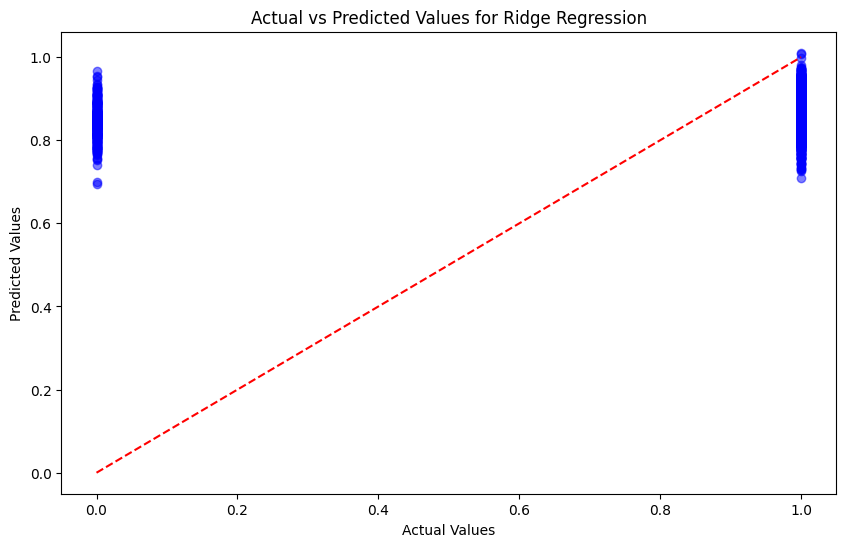

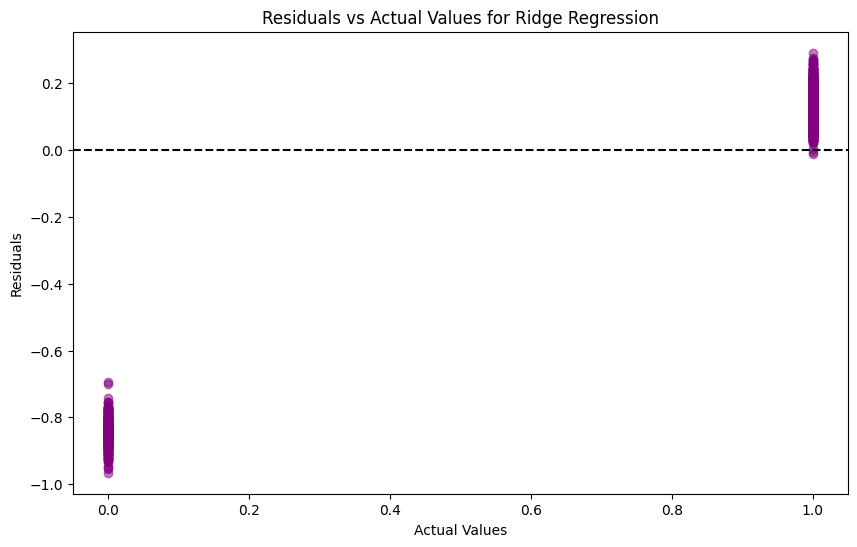

In [42]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error, mean_squared_log_error

# Load your dataset
dataset = pd.read_csv('expanded_post_secondary_dropout_dataset 1.csv')

# Select relevant columns
selected_columns = [
    'Gender', 'Marital status', 'Course', 'Previous qualification',
    'Nacionality', 'Educational special needs', 'Scholarship holder',
    'HS GPA', 'Family Income', 'Target'
]
newdata = dataset[selected_columns]

# Handle missing values
newdata = newdata.dropna()  # Drop rows with missing values

# Encode categorical variables
categorical_cols = ['Gender', 'Marital status', 'Course', 'Previous qualification',
                    'Nacionality', 'Educational special needs', 'Scholarship holder']
newdata = pd.get_dummies(newdata, columns=categorical_cols, drop_first=True)

# Split into predictors (X) and target variable (y)
X = newdata.drop(columns=['Target'], errors='ignore')
y = newdata['Target']

# Ensure the target variable is numeric
y = pd.to_numeric(y, errors='coerce')

# Align X with y after cleaning
X = X.loc[y.index]

# Add a constant to the predictors
X = sm.add_constant(X)

# Define the parameter grid for Ridge regression
param_grid = {
    'alpha': np.logspace(-3, 3, 7)  # Search for alpha values from 0.001 to 1000
}

# Instantiate Ridge regression model
ridge_model = Ridge()

# Setup GridSearchCV with cross-validation
grid_search = GridSearchCV(
    estimator=ridge_model,
    param_grid=param_grid,
    scoring='neg_mean_absolute_error',  # Use MAE as the scoring metric
    cv=5,  # 5-fold cross-validation
    verbose=1,
    n_jobs=-1  # Use all available cores for parallel processing
)

# Fit the GridSearchCV model to the training data
grid_search.fit(X, y)

# Get the best parameters and best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Print the best parameters and best cross-validated score
print("Best Hyperparameters for Ridge Regression:", best_params)
print("Best Cross-Validated MAE:", -grid_search.best_score_)

# Predict using the best model
y_pred = best_model.predict(X)

# Calculate performance metrics
rmse = np.sqrt(mean_squared_error(y, y_pred))
mae = mean_absolute_error(y, y_pred)
msle = mean_squared_log_error(y + 1, y_pred + 1)  # Adding 1 to avoid log(0)
median_ae = median_absolute_error(y, y_pred)

# Display the performance metrics
print("\nOptimized Ridge Regression Performance:")
print(f" - RMSE: {rmse:.4f}")
print(f" - MAE: {mae:.4f}")
print(f" - MSLE: {msle:.4f}")
print(f" - Median Absolute Error: {median_ae:.4f}")

# Visualize predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred, color='blue', alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values for Ridge Regression')
plt.show()

# Visualize residuals
residuals = y - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y, residuals, color='purple', alpha=0.5)
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Actual Values for Ridge Regression')
plt.show()


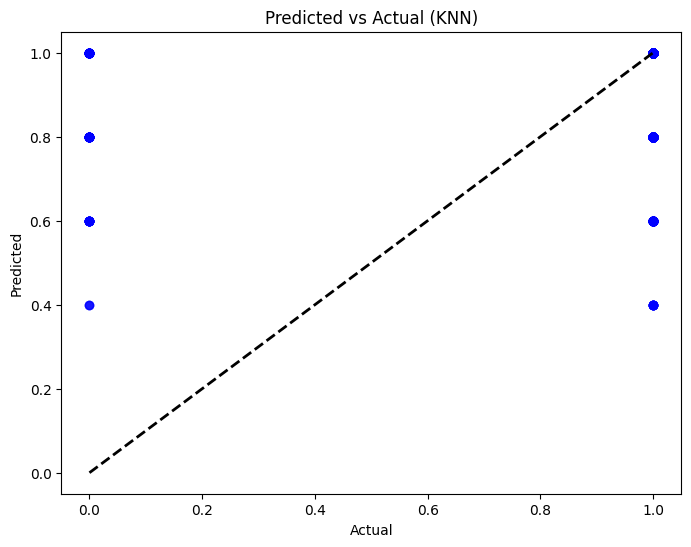

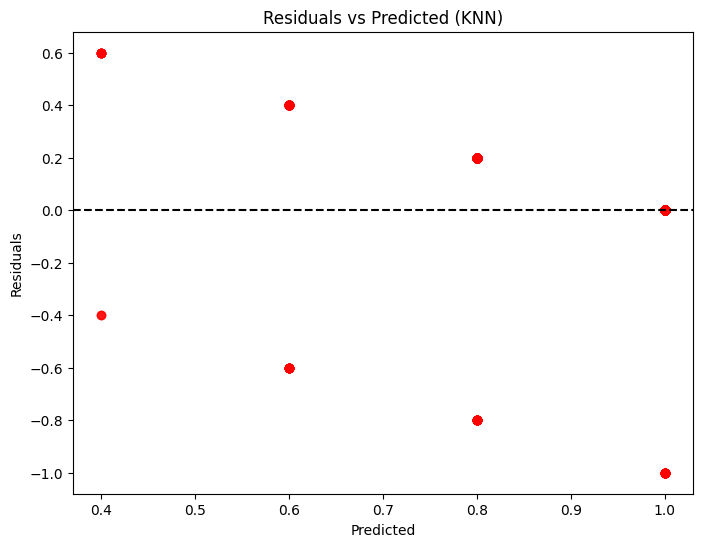

Fitting 5 folds for each of 20 candidates, totalling 100 fits

Best Hyperparameters for KNN: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
Best Cross-Validated MAE: 0.2353476811907859

Optimized KNN Performance:
 - RMSE: 0.4196
 - MAE: 0.2367
 - MSLE: 0.07961483523331202
 - Median Absolute Error: 0.0000


In [41]:
# Predicted vs Actual Plot for KNN
knn_predictions = predictions["KNN"]
plt.figure(figsize=(8, 6))
plt.scatter(y_test, knn_predictions, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title("Predicted vs Actual (KNN)")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

# Residual vs Predicted Plot for KNN
knn_residuals = y_test - knn_predictions
plt.figure(figsize=(8, 6))
plt.scatter(knn_predictions, knn_residuals, alpha=0.7, color='red')
plt.axhline(y=0, color='k', linestyle='--')
plt.title("Residuals vs Predicted (KNN)")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

# Hyperparameter Tuning for KNN
param_grid_knn = {
    "n_neighbors": [3, 5, 7, 9, 11],
    "weights": ["uniform", "distance"],
    "metric": ["euclidean", "manhattan"]
}

grid_knn = GridSearchCV(
    estimator=KNeighborsRegressor(),
    param_grid=param_grid_knn,
    scoring="neg_mean_absolute_error",
    cv=5,
    verbose=2,
    n_jobs=-1
)
grid_knn.fit(X_train, y_train)

# Best Hyperparameters and Performance
print("\nBest Hyperparameters for KNN:", grid_knn.best_params_)
print("Best Cross-Validated MAE:", -grid_knn.best_score_)

# Evaluate Optimized KNN Model
best_knn_model = grid_knn.best_estimator_
optimized_predictions = best_knn_model.predict(X_test)

# Calculate Metrics for Optimized Model
optimized_metrics = calculate_metrics(y_test, optimized_predictions)
print("\nOptimized KNN Performance:")
print(f" - RMSE: {optimized_metrics[0]:.4f}")
print(f" - MAE: {optimized_metrics[1]:.4f}")
print(f" - MSLE: {optimized_metrics[2]}")
print(f" - Median Absolute Error: {optimized_metrics[3]:.4f}")


# **Hyperparameter tuning for KNN was performed to explore whether it could be enhanced to outperform Linear Regression or provide additional insights, but based on your results, it did not.**